<a href="https://colab.research.google.com/github/a12475981007/NCHU/blob/main/Image%20Process/HW01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

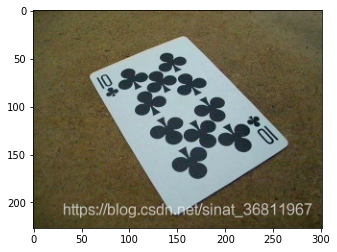

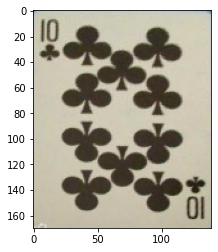

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def image_process(image, pts):
  lt, rt, rd, ld = pts

  widthA = np.sqrt(((lt[0] - rt[0]) ** 2) + ((lt[1] - rt[1]) ** 2))
  widthB = np.sqrt(((rd[0] - ld[0]) ** 2) + ((rd[1] - ld[1]) ** 2))
  maxWidth = max(int(widthA), int(widthB))

  heightA = np.sqrt(((lt[0] - ld[0]) ** 2) + ((lt[1] - ld[1]) ** 2))
  heightB = np.sqrt(((rt[0] - rd[0]) ** 2) + ((rt[1] - rd[1]) ** 2))
  maxHeight = max(int(heightA), int(heightB))

  new_image_size = np.array([
      [0, 0],
      [maxWidth, 0],
      [maxWidth, maxHeight],
      [0, maxHeight]], dtype="float32")

  M = cv2.getPerspectiveTransform(src_img_size, new_image_size)
  warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
  return warped

image = cv2.imread('input.png')

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

four_points = [(58,68), (157,26), (266,138), (148,213)]
src_img_size = np.array(four_points, dtype="float32")
result = image_process(image, np.array(four_points))
plt.imshow(result)
